In [63]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_excel('output_file.xlsx',index_col=0)

In [64]:
%matplotlib inline

In [65]:
print(df.shape)
print(df.describe())

(315, 57)
           S. No.  10th Percentage   12th Percentange  UG - CGPA (out of 10)   \
count  315.000000        315.000000        315.000000              315.000000   
mean   158.000000         28.780578         27.738477               69.996381   
std     91.076891         38.711050         36.735376               11.868543   
min      1.000000          0.000000          0.000000                0.000000   
25%     79.500000          0.000000          0.000000               65.000000   
50%    158.000000          0.000000          0.000000               69.000000   
75%    236.500000         74.800000         69.780000               77.950000   
max    315.000000        100.000000         98.700000              100.000000   

       GPA (Out of 4)  PG - CGPA or %   AcadScore    UniScore       noopt  
count      315.000000      315.000000  315.000000  315.000000  315.000000  
mean        70.359365       14.463683  211.338483   84.460063    0.660317  
std         12.222393       29.3

In [66]:
df.columns

Index(['S. No.', 'Candidate Name', 'Counselor Name',
       'Block Amount Received Date', 'Univ. Pitched',
       'Candidate Preferred College #1', 'Candidate Preferred College #2',
       '10th Percentage ', '12th Percentange', 'UG - CGPA (out of 10) ',
       'GPA (Out of 4)', 'PG - CGPA or %', 'Work Exp.', 'Highest Education',
       'Designation - Company Name ', 'Candidate Application Status',
       'Candidate Loan Status', 'KYC & Acad Documents Received',
       'Tech Exam Scores', 'Coding Test Score', 'English Exam Scores',
       'English Interview Score (15)', 'Tech. interview Score (10)',
       'Application Type', 'Intake Status', 'U1Choice of School #1',
       'U1Choice of Program #1', 'U1Passport #1', 'U1Resume #1', 'U1Degree #1',
       'U1Transcript #1', 'U1Application Status #1', 'U1Offer Letter #1',
       'U2Choice of School #2', 'U2Choice of Program #2',
       'U2Application Status #2', 'U2Offer Letter #2', 'U2Deposit #2',
       'U3Choice of School #3', 'U3Choice

Popularly Chosen Schools


Number of available choices :  24 



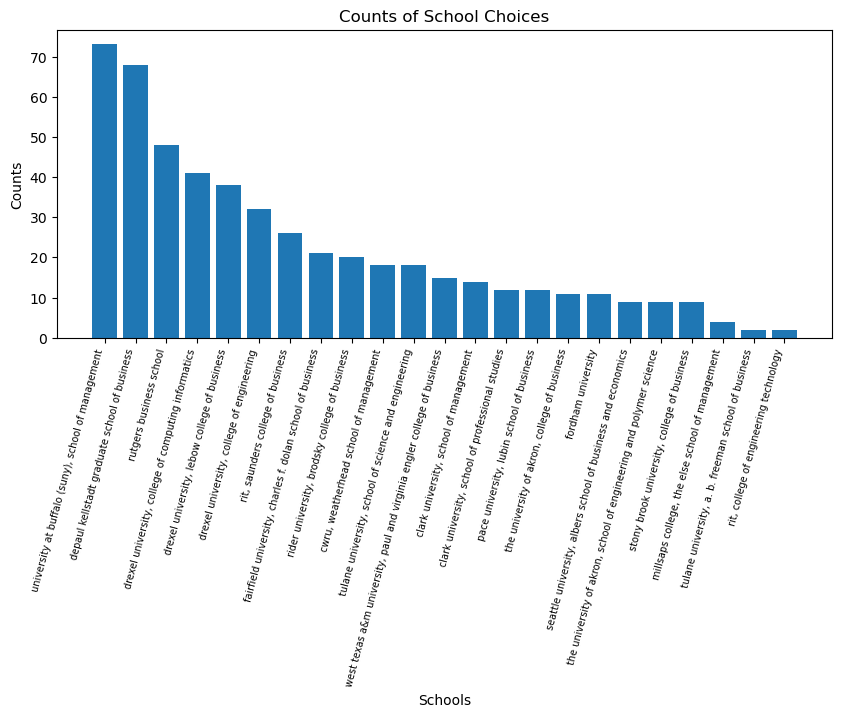

In [67]:

checkcol = ['U1Choice of School #1', 'U2Choice of School #2', 'U3Choice of School #3']

unis = pd.concat([df[col] for col in checkcol])

uniqueuni = unis.unique()

print("Number of available choices : ",len(uniqueuni),'\n')

uni_val_counts = unis.value_counts()

value_to_exclude = 'No Choice'
filterd_uni_val_counts = uni_val_counts[uni_val_counts.index != value_to_exclude]

plt.figure(figsize=(10, 4))

# truncated_labels = [label[:40] for label in filterd_uni_val_counts.index]
# plt.bar(truncated_labels, filterd_uni_val_counts)

plt.bar(filterd_uni_val_counts.index,filterd_uni_val_counts)

plt.xlabel('Schools')
plt.ylabel('Counts')
plt.title('Counts of School Choices')
plt.xticks(rotation=75,fontsize = 7,ha='right')
plt.show()


In [68]:
df['UniScore'].quantile(0.75)
df['UniScore'].quantile(0.25)
df['UniScore'].max()
df['UniScore'].mean()

84.4600634920635

Make two new temporary dataframes which only contains students who received at least one offer letter or didnt

In [69]:
select_stds_df = df[df['noopt'] == 1]
not_select_stds_df = df[df['noopt'] == 0]

select_stds_df.to_excel('selectedStudents.xlsx')
not_select_stds_df.to_excel('notSelectedStudents.xlsx')

# print(select_stds_df.shape)
# print(not_select_stds_df.shape)

print("No of students who dont receive any offer letters : ",len(not_select_stds_df))
print("No of students who received a offer letters : ",len(select_stds_df))

No of students who dont receive any offer letters :  107
No of students who received a offer letters :  208


Compare UniScores(aggregate of UG and PG) between selected and unselected students

In [70]:
print("Average of unselected students : ",not_select_stds_df['UniScore'].mean())
print("Average of selected students : ",select_stds_df['UniScore'].mean())

Average of unselected students :  78.35785046728971
Average of selected students :  87.59918269230769


Compare scores of students who were accepted according to their respective universities

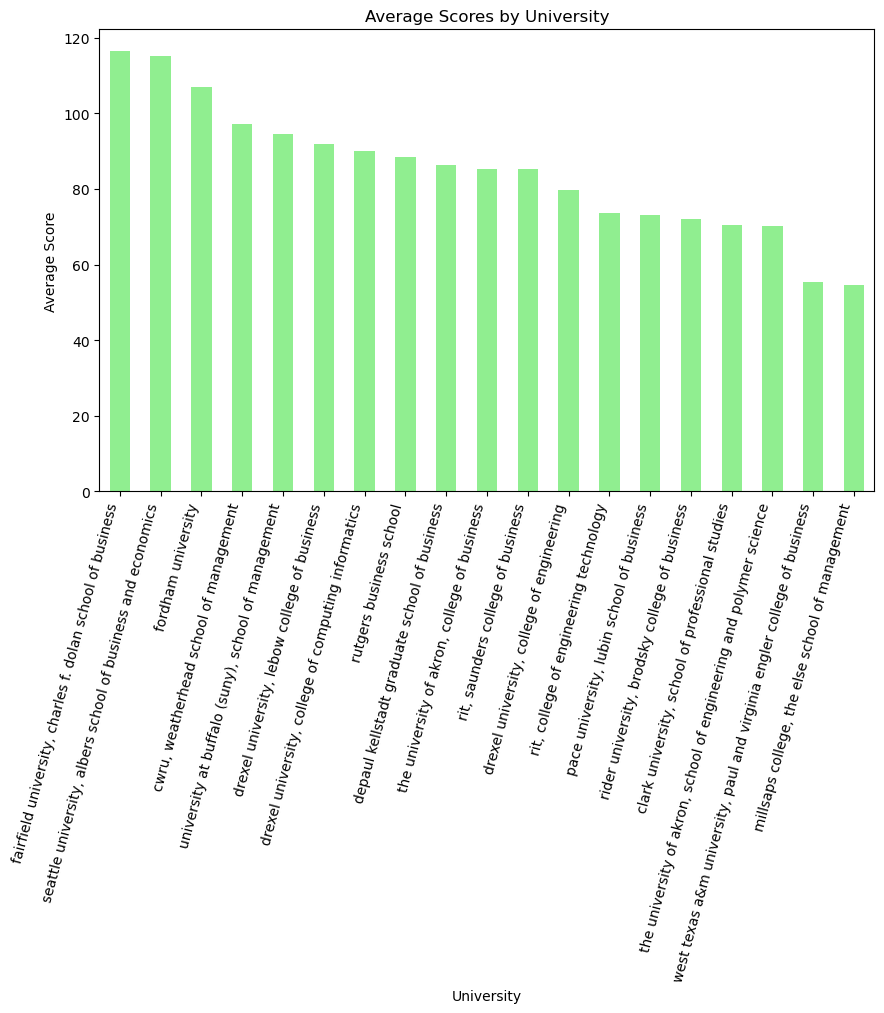

In [71]:
average_scores = select_stds_df.groupby('prefopt')['UniScore'].mean()

average_scores = average_scores.sort_values(ascending=False)

plt.figure(figsize=(10, 6))
average_scores.plot(kind='bar', color='lightgreen')
plt.xlabel('University')
plt.ylabel('Average Score')
plt.title('Average Scores by University')
plt.xticks(rotation=75, ha='right')
plt.show()

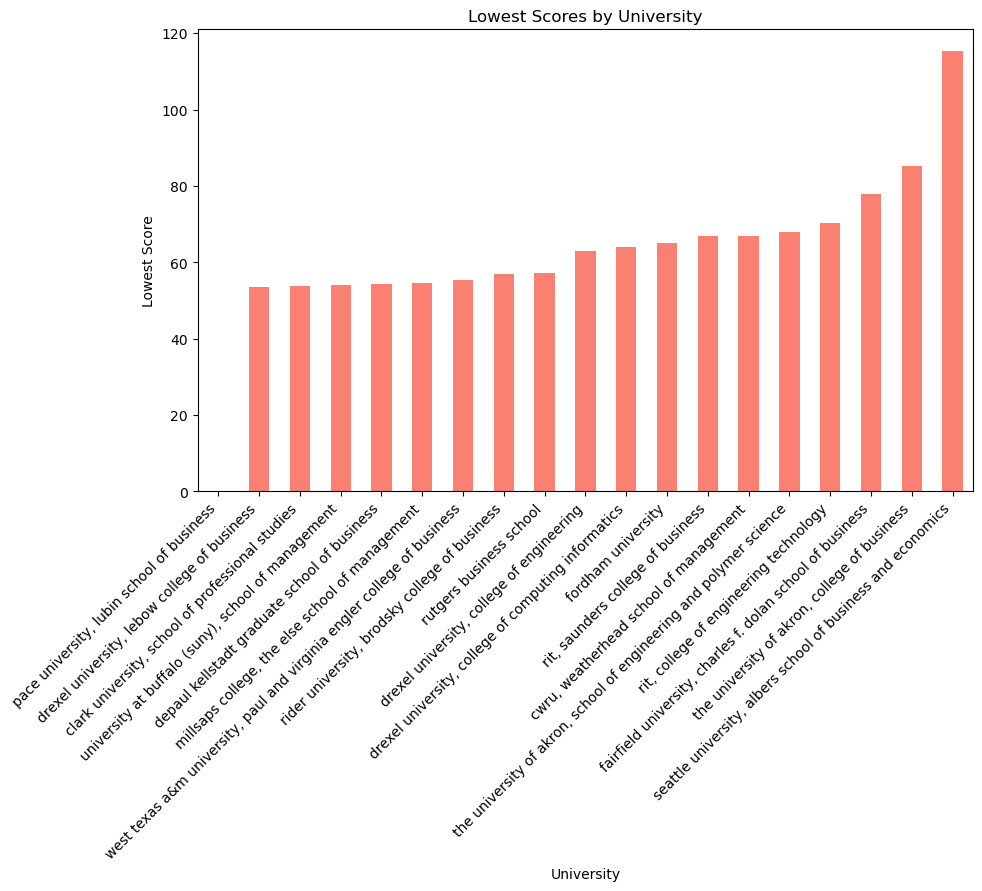

In [72]:
lowest_scores = df.groupby('prefopt')['UniScore'].min()

# Sort lowest scores in ascending order
lowest_scores = lowest_scores.sort_values(ascending=True)

# Plot the lowest scores
plt.figure(figsize=(10, 6))
lowest_scores.plot(kind='bar', color='salmon')
plt.xlabel('University')
plt.ylabel('Lowest Score')
plt.title('Lowest Scores by University')
plt.xticks(rotation=45, ha='right')
plt.show()

C:\Users\Edwin\AppData\Local\Temp\ipykernel_9856\3731875664.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  select_stds_df['College_encoded'] = label_encoder.fit_transform(select_stds_df['prefopt'])
c:\Users\Edwin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\Edwin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warni

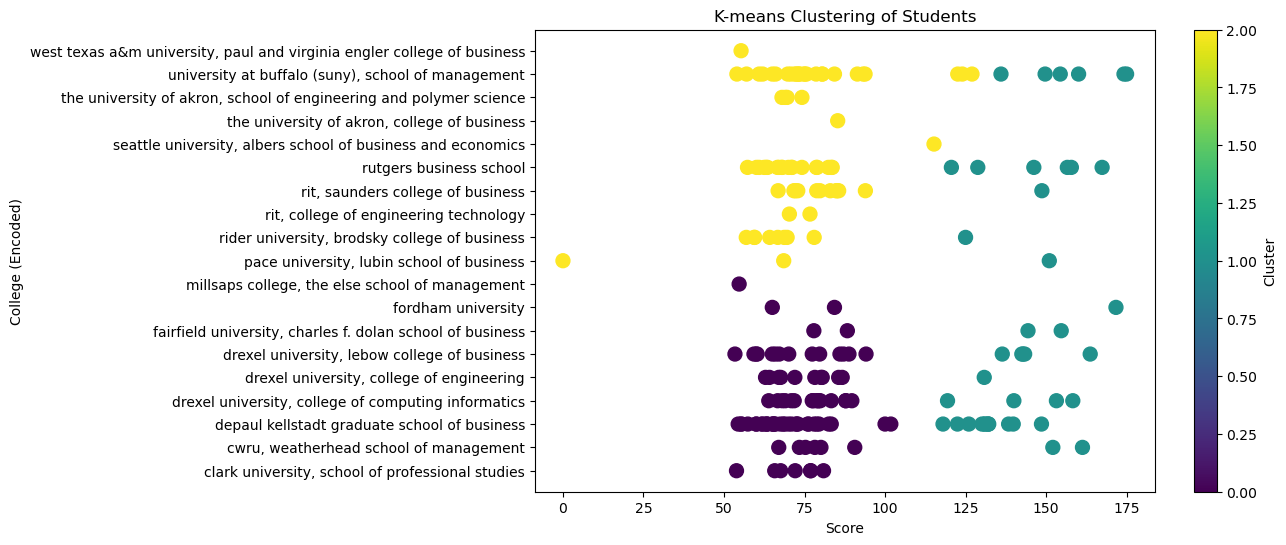

Cluster Centers (scaled):
[[-0.46819772 -0.8238002 ]
 [ 1.78049849 -0.11598715]
 [-0.42899926  1.06449705]]
     S. No. Candidate Name    Counselor Name Block Amount Received Date  \
0         1         vikash  shailendra singh                      45152   
1         2        hariraj  shailendra singh                      45188   
2         3       thippesh  shailendra singh                      45190   
3         4        chintan  shailendra singh                      45202   
4         5          sagar  shailendra singh                      45181   
..      ...            ...               ...                        ...   
310     311         samkit   muskan aggarwal                      45396   
311     312         alladi  rishabh tripathi                      45397   
312     313       shrishti  rishabh tripathi                      45397   
313     314        purnima  rishabh tripathi                      45397   
314     315          ashok   diptikanta jena                      4

In [73]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder, StandardScaler

label_encoder = LabelEncoder()
select_stds_df['College_encoded'] = label_encoder.fit_transform(select_stds_df['prefopt'])

features = select_stds_df[['UniScore', 'College_encoded']]

scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

kmeans = KMeans(n_clusters=3, random_state=0)
select_stds_df['Cluster'] = kmeans.fit_predict(features_scaled)


plt.figure(figsize=(10, 6))
plt.scatter(select_stds_df['UniScore'], select_stds_df['College_encoded'], c=select_stds_df['Cluster'], cmap='viridis', s=100)
plt.xlabel('Score')
plt.ylabel('College (Encoded)')
plt.title('K-means Clustering of Students')
plt.colorbar(label='Cluster')
plt.yticks(ticks=range(len(label_encoder.classes_)), labels=label_encoder.classes_)
plt.show()


print('Cluster Centers (scaled):')
print(kmeans.cluster_centers_)


print(df)

In [74]:
select_stds_df.to_excel('temp.xlsx')